# Legendre Fenchel Transform

In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
import sys
sys.path.append("../")
from convex_hull import convex_hull

In [15]:
def legendre_fenchel(x, y, p):
    #y = f(x)で与えられるinput(x, y)に対し、Legendre-Fenchel transformを計算する
    #(f^*(p)=sup_x(px - f(x)) = inf_x(f(x)-px), 傾きvを固定し,x[i] p - y[i]が最大となるx[i]を探す。すなわち、傾きvがある点x[i]での∇f(x[i])となるx[i]を探す
    
    #print(p)                                      #x = p: x座標を分割した添字 
    chi, v = convex_hull(x, y)                    #chi:convex_hullになったx,y座標の添字(conv) v:現在と次の点を結んだ線の傾き(現在の点での接戦の傾き（微分）)
    #print(chi, v)
    v.append(np.Inf)

    t = []
    iopt = np.zeros_like(p, dtype=int)           #x = v = np.linspace(-10, 10, 100),  np.zeros_like():要素全て0に初期化
    i = 0
    for j, p in enumerate(p):
        while p > v[i]:                  #v[i]:現在と次の点を結んだ線の傾きは単調増加より、p:[-10,10]を99等分(-10,…,10)したものに対し、v[i]^を大きくしていき、
            #print(v, s[i])              #傾きpがv[i](分割を小さく取れば∇f(x)と等しい)と等しいもしくは大きくなる時までvを大きくする
            i += 1
        iopt[j] = chi[i]                 
        t.append(x[chi[i]] * p - y[chi[i]])  #p=v[i]=∇f(x)となるx座標=ipot[j]とf^*(v)=tを保存
        
    return t, iopt


$f^*(p) = \sup_{x}\{xp - f(x)\}$

pの意味

$x$座標の各点における接線を近似するもの。つまり、convex hullの傾き$v$が$p$に存在することが必要である。適切な $p$ を選択しないと、$f^{**} = cl(conv f)$にならない。

必要な傾きはconvex hullのコードの $v$ の値であるため、$p$ を $p = v$ に設定すると $f^{**} = cl(conv f)$ になる。
Legendre Fenchel Transformのコードだけでは、convex hullがわかっていないという前提でプログラムを作るので、必要な傾き（convex hullのコードの $v$ ）がわからないという前提でプログラムを作っている。

## Check program behavior

### Example. 1 \: $x = [1, 2, 3, 4, 5], y = [0, 1, -1.5, 1, 0]$

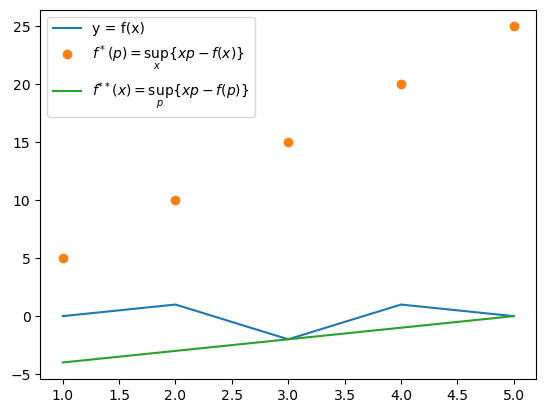

In [16]:
x = [1, 2, 3, 4, 5]
y = [0, 1, -2, 1, 0]

plt.plot(x, y, label=r'y = f(x)')
    
p = x
t, _ = legendre_fenchel(x, y, p)
plt.plot(p, t, 'o', label=r'$f^*(p) = \sup_{x}\{xp - f(x)\}$')

# f** gives the convex hull
yss, _ = legendre_fenchel(p, t, x)
plt.plot(x, yss, label=r'$f^{**}(x) = \sup_{p}\{xp - f(p)\}$')
plt.legend()
plt.show()

$p$に$v$の傾き$[-1,1]$を設定していないため、$f^{**} \neq cl(conv f)$になっている。

$x = p = [1, 2, 3, 4, 5], y = [0, 1, -2, 1, 0], chi = [0, 2, 4], v = [-1, 1, + \infty]$

$
f^*(p) = max_x\{xp - f(x)\} =  \left\{
\begin{array}{ll}
3 \cdot 1 - (-2) =  5 & (p = 1, i = 1, chi[i] = 2)\\
5 \cdot 2 -   0  = 10 & (p = 2, i = 2, chi[i] = 4)\\
5 \cdot 3 -   0  = 15 & (p = 3, i = 2, chi[i] = 4)\\
5 \cdot 4 -   0  = 20 & (p = 4, i = 2, chi[i] = 4)\\
5 \cdot 5 -   0  = 25 & (p = 5, i = 2, chi[i] = 4)
\end{array}
\right.
$

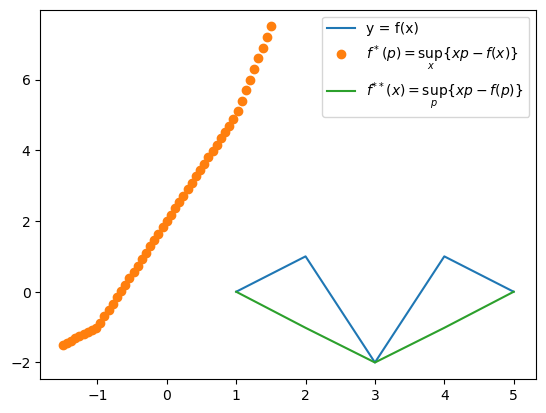

In [17]:
x = [1, 2, 3, 4, 5]
y = [0, 1, -2, 1, 0]

plt.plot(x, y, label=r'y = f(x)')
    
p = np.linspace(-1.5,1.5,51)
t, _ = legendre_fenchel(x, y, p)
plt.plot(p, t, 'o', label=r'$f^*(p) = \sup_{x}\{xp - f(x)\}$')

# f** gives the convex hull
yss, _ = legendre_fenchel(p, t, x)
plt.plot(x, yss, label=r'$f^{**}(x) = \sup_{p}\{xp - f(p)\}$')
plt.legend()
plt.show()

$
f^*(p) = max_x\{xp - f(x)\} =  \left\{
\begin{array}{ll}
1 \cdot (-1) - 0    = -1 & (p = -1, i = 0, chi[i] = 0)\\
3 \cdot 0    - (-2) =  2 & (p =  0, i = 1, chi[i] = 2)\\
3 \cdot 1    - (-2) =  5 & (p =  1, i = 1, chi[i] = 2)
\end{array}
\right.
$

### Example. 2: Legendre-Fenchel is an identity for $f(x) = 0.5 x^2$

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100]
[-10.   -9.8  -9.6  -9.4  -9.2  -9.   -8.8  -8.6  -8.4  -8.2  -8.   -7.8
  -7.6  -7.4  -7.2  -7.   -6.8  -6.6  -6.4  -6.2  -6.   -5.8  -5.6  -5.4
  -5.2  -5.   -4.8  -4.6  -4.4  -4.2  -4.   -3.8  -3.6  -3.4  -3.2  -3.
  -2.8  -2.6  -2.4  -2.2  -2.   -1.8  -1.6  -1.4  -1.2  -1.   -0.8  -0.6
  -0.4  -0.2   0.    0.2   0.4   0.6   0.8   1.    1.2   1.4   1.6   1.8
   2.    2.2   2.4   2.6   2.8   3.    3.2   3.4   3.6   3.8   4.    4.2
   4.4   4.6   4.8   5.    5.2   5.4   5.6   5.8   6.    6.2   6.4   6.6
   6.8   7.    7.2   7.4   7.6   7.8   8.    8.2   8.4   8.6   8.8   9.
   9.2 

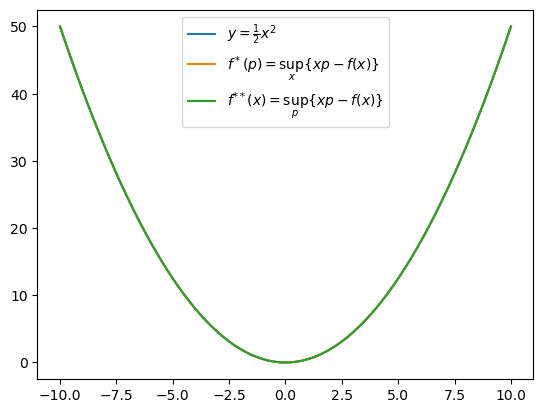

In [18]:
x = np.linspace(-10, 10, 101)          #[-10,10]を100等分(-10,…,10), numpy.linspace(最初の値,最後の値,要素数)  
y = 0.5*x**2

p = x
t, iopt = legendre_fenchel(x, y, p)      #legendre_fenchelの関数の帰りから、tだけをとってくる
#print(t, _)
print(iopt)
print(x[iopt])
#print(np.abs(t - y))
assert np.max(np.abs(t - y)) == 0.        #assert 条件式, 条件式がFalseの場合に出力するメッセージ　（条件式がTrueではない時に、例外を投げる）
plt.plot(x, y, label=r'$y = \frac{1}{2}x^2$')
plt.plot(p, t, label=r'$f^*(p) = \sup_{x}\{xp - f(x)\}$')

yss, iopt2 = legendre_fenchel(p, t, x)
plt.plot(x, yss, label=r'$f^{**}(x) = \sup_{p}\{xp - f(x)\}$')
print(iopt2)
print(x[iopt2])
plt.legend()
plt.show()

### Example. 3:  $f(x) = (x - 1)^2 (x + 1)^2$ 

[20 20 20 20 21 21 21 21 21 21 21 21 21 21 21 21 22 22 22 22 22 22 22 22
 22 22 22 23 23 23 23 23 23 23 23 23 23 24 24 24 24 24 24 24 24 24 25 25
 25 25 25 75 75 75 75 76 76 76 76 76 76 76 76 76 77 77 77 77 77 77 77 77
 77 77 78 78 78 78 78 78 78 78 78 78 78 79 79 79 79 79 79 79 79 79 79 79
 79 80 80 80 80]
[-1.2  -1.2  -1.2  -1.2  -1.16 -1.16 -1.16 -1.16 -1.16 -1.16 -1.16 -1.16
 -1.16 -1.16 -1.16 -1.16 -1.12 -1.12 -1.12 -1.12 -1.12 -1.12 -1.12 -1.12
 -1.12 -1.12 -1.12 -1.08 -1.08 -1.08 -1.08 -1.08 -1.08 -1.08 -1.08 -1.08
 -1.08 -1.04 -1.04 -1.04 -1.04 -1.04 -1.04 -1.04 -1.04 -1.04 -1.   -1.
 -1.   -1.   -1.    1.    1.    1.    1.    1.04  1.04  1.04  1.04  1.04
  1.04  1.04  1.04  1.04  1.08  1.08  1.08  1.08  1.08  1.08  1.08  1.08
  1.08  1.08  1.12  1.12  1.12  1.12  1.12  1.12  1.12  1.12  1.12  1.12
  1.12  1.16  1.16  1.16  1.16  1.16  1.16  1.16  1.16  1.16  1.16  1.16
  1.16  1.2   1.2   1.2   1.2 ]


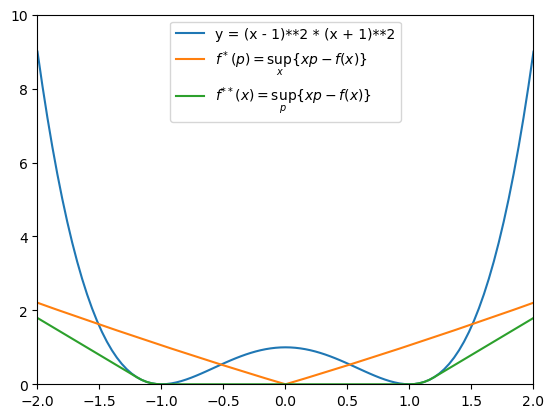

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   8  19  28  38  46  50  50  50  50  50  50  50  50  50  50
  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50
  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50
  50  50  50  50  58  66  76  94 100 100 100 100 100 100 100 100 100 100
 100 100 100 100 100 100 100 100 100 100 100]
[-2.   -2.   -2.   -2.   -2.   -2.   -2.   -2.   -2.   -2.   -2.   -2.
 -2.   -2.   -2.   -2.   -2.   -2.   -2.   -2.   -2.   -1.68 -1.24 -0.88
 -0.48 -0.16  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.32  0.64  1.04  1.76  2.    2.    2.    2.
  2.    2.    2.    2.    2.    2.    2.    2.    2.    2.    2.    2.
  2.    2.    2.   

In [19]:
x = np.linspace(-2, 2, 101)
y = (x - 1)**2 * (x + 1)**2

plt.plot(x, y, label=r'y = (x - 1)**2 * (x + 1)**2')
p = x
t, iopt = legendre_fenchel(x, y, p)
plt.plot(p, t, label=r'$f^*(p) = \sup_{x}\{xp - f(x)\}$')
print(iopt)
print(x[iopt])

# f** gives the convex hull
yss, iopt2 = legendre_fenchel(p, t, x)
plt.plot(x, yss, label=r'$f^{**}(x) = \sup_{p}\{xp - f(x)\}$')
plt.xlim(-2,2)
plt.ylim(0,10)
plt.legend()
plt.show()
print(iopt2)
print(x[iopt2])

$p \in [-2, 2]$であるため、$f^{**}$の傾きが$[-2, 2]$の範囲しか表現できない。

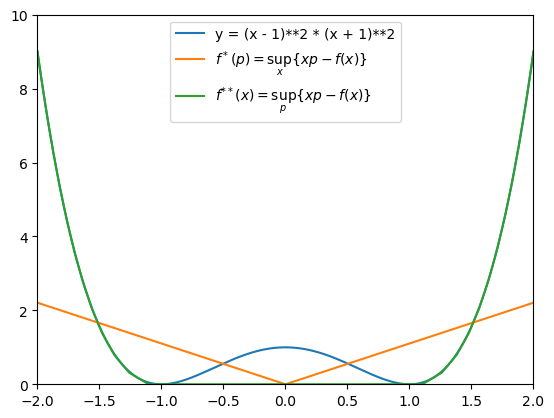

In [20]:
x = np.linspace(-2, 2, 1001)
y = (x - 1)**2 * (x + 1)**2

plt.plot(x, y, label=r'y = (x - 1)**2 * (x + 1)**2')
p = np.linspace(-1000, 1000, 1001)
t, _ = legendre_fenchel(x, y, p)
plt.plot(p, t, label=r'$f^*(p) = \sup_{x}\{xp - f(x)\}$')

# f** gives the convex hull
yss, _ = legendre_fenchel(p, t, x)
plt.plot(x, yss, label=r'$f^{**}(x) = \sup_{p}\{xp - f(x)\}$')
plt.xlim(-2,2)
plt.ylim(0,10)
plt.legend()
plt.show()